In [1]:
%matplotlib notebook
from Inn import AtmosData
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

dataLocation1 = '/local0/scratch/HAlphaGridExportStatic/DoublePicoMegaPickle50.pickle'
dataLocation2 = '/local0/scratch/HAlphaGridExportStatic/TestPickle50.pickle'
dataLocation3 = '/local0/scratch/HAlphaGridExportStatic/MiniBalancedTraining.pickle'

data = AtmosData([dataLocation1, dataLocation2])

In [2]:
numClusters = 20
buildLinks = linkage(data.lines[0])
labels = range(1, data.lines[0].shape[0]+1)

In [ ]:
plt.figure(figsize=(10, 7))
_ = dendrogram(buildLinks,
           p=numClusters*2,
           truncate_mode='level',
          orientation='top',
          labels=labels,
          distance_sort='descending',
          show_leaf_counts=True)

In [3]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [4]:
cluster = AgglomerativeClustering(n_clusters=numClusters, affinity='euclidean', linkage='ward')
cluster.fit(data.lines[0])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=20,
            pooling_func=<function mean at 0x7fe1d4264bf8>)

<IPython.core.display.Javascript object>


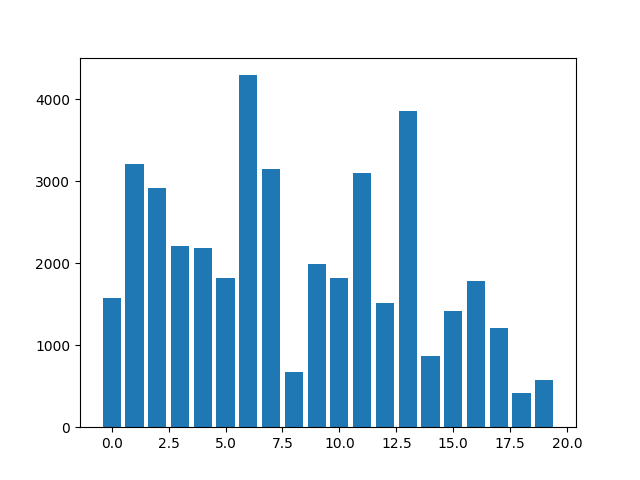

<BarContainer object of 20 artists>

In [5]:
h = np.histogram(cluster.labels_, bins=np.unique(cluster.labels_).shape[0])
plt.figure()
plt.bar(sorted(np.unique(cluster.labels_)), h[0])

In [6]:
classes = sorted(np.unique(cluster.labels_))
clusters = cluster.labels_
meanLine = []
for c in classes:
    idxs = clusters == c
    meanLine.append(np.mean(data.lines[0].numpy()[idxs], axis=0))

<IPython.core.display.Javascript object>


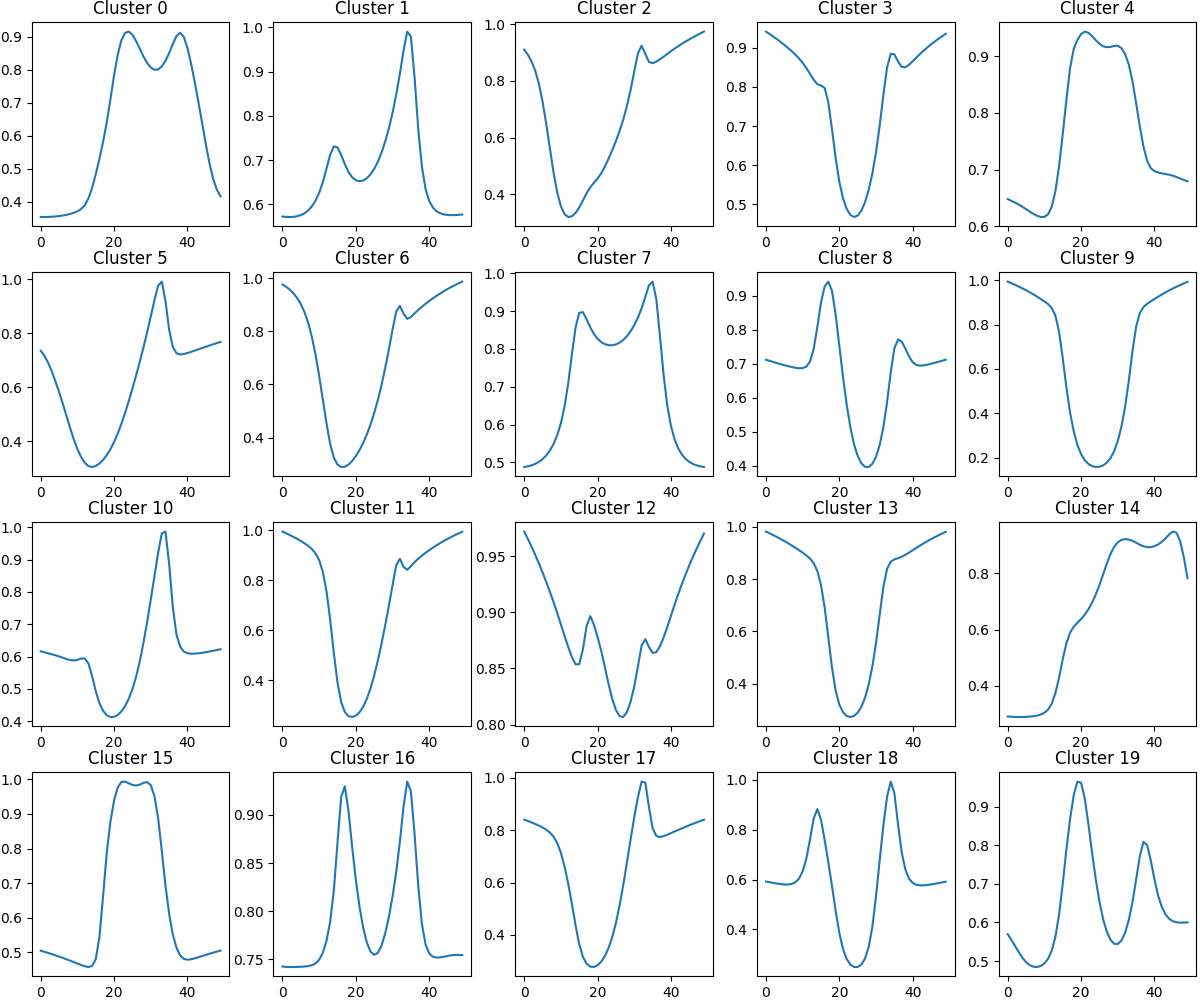

In [7]:
root = int(np.sqrt(numClusters))
if root**2 >= numClusters:
    gridSize = (root, root)
elif (root+1) * root >= numClusters:
    gridSize = (root, root+1)
else:
    gridSize = (root+1, root+1)
    
fig, ax = plt.subplots(*gridSize, figsize=(12,10))
for row in range(gridSize[0]):
    for col in range(gridSize[1]):
        i = row * gridSize[1] + col
        if i >= numClusters:
            break
            
        ax[row, col].plot(meanLine[i])
        ax[row, col].set_title('Cluster %d' % i)
        
fig.tight_layout(pad=0)

In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
idxs14 = clusters == 14
idxs14.sum()
cluster14 = data.lines[0].numpy()[idxs14].copy()
np.random.shuffle(cluster14)

numPlots = 64
root = int(np.sqrt(numPlots))
if root**2 >= numClusters:
    gridSize = (root, root)
elif (root+1) * root >= numClusters:
    gridSize = (root, root+1)
else:
    gridSize = (root+1, root+1)
    
fig, ax = plt.subplots(*gridSize, figsize=(12,10))
for row in range(gridSize[0]):
    for col in range(gridSize[1]):
        i = row * gridSize[1] + col
        if i >= numPlots:
            break
            
        ax[row, col].plot(cluster14[i])
#         ax[row, col].set_title('' % i)
        
fig.tight_layout(pad=0)

In [ ]:
first14 = np.argmax(idxs14 == True)
fig, ax = plt.subplots(3,1)
ax1 = ax[0].twinx()
fig.show()
fig.canvas.draw()

# velDensProfiles = 10**(torch.abs(velDensProfiles - 1)) * velDensProfiles / velDensProfiles.abs() 

for idx in range(first14-50, first14+50):
    [a.clear() for a in ax]
    ax1.clear()
    
    ax[0].semilogy(data.ne[idx].numpy(), label='ne')
    ax1.semilogy(data.temperature[idx].numpy(), color='C1', label='temp')
    ax[1].plot(10**(np.abs(data.vel[idx].numpy()-1)) * data.vel[idx].numpy() / np.abs(data.vel[idx].numpy()), color='C2', label='vel')
    ax[2].plot(data.lines[0][idx].numpy(), color='C3', label='line')
    fig.suptitle('Idx: %d (%d, %d)' % (idx, first14-50, first14+50))
    fig.legend()
    fig.canvas.draw()

In [ ]:
import pickle

with open(dataLocation1, 'rb') as p:
    d = pickle.load(p)
    
idx = 0
s = d['nTime'][0]
while s < first14:
    idx += 1
    s += d['nTime'][idx]


    

In [ ]:
d['temperature']

In [ ]:
print(d['beamSpectralIndex'][idx])
print('%e' % d['totalBeamEnergy'][idx])
print(d['beamPulseType'][idx])

print(d['cutoffEnergy'][idx])
t = (first14 - (s - d['nTime'][idx])) * 0.1
print('t: %.2f' % t)

In [ ]:
all14Idxs = np.nonzero(clusters == 14)[0]

idxDict = {}
for i in all14Idxs:
    idx = 0
    s = d['nTime'][0]
    while s < i:
        idx += 1
        s += d['nTime'][idx]
    t = (i - (s - d['nTime'][idx])) * 0.1
    if idx in idxDict:
        idxDict[idx].append(t)
    else:
        idxDict[idx] = [t]
for idx, times in idxDict.items():
    t = ['%.1f' % t for t in times]
    contig = all(['%.1f' % (float(t[0]) + 0.1*i) == t[i] for i in range(len(t))])
    if contig:
        t = '[%s - %s]' % (t[0], t[-1])
    else:
        t = '[' + ', '.join(t) + ']'
    print('%d, t: %s, E: %.1e, delta: %d, E_co: %s' % (idx, t, d['totalBeamEnergy'][idx], d['beamSpectralIndex'][idx], d['cutoffEnergy'][idx]))

<IPython.core.display.Javascript object>


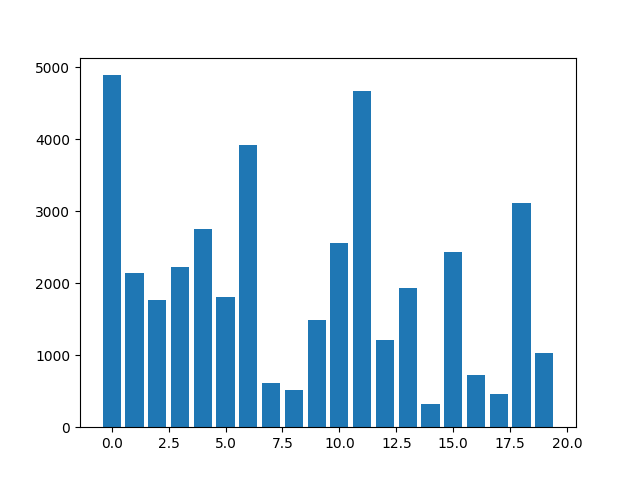

<BarContainer object of 20 artists>

In [9]:
cluster = AgglomerativeClustering(n_clusters=numClusters, affinity='euclidean', linkage='ward')
cluster.fit(data.lines[1])
h = np.histogram(cluster.labels_, bins=np.unique(cluster.labels_).shape[0])
plt.figure()
plt.bar(sorted(np.unique(cluster.labels_)), h[0])

<IPython.core.display.Javascript object>


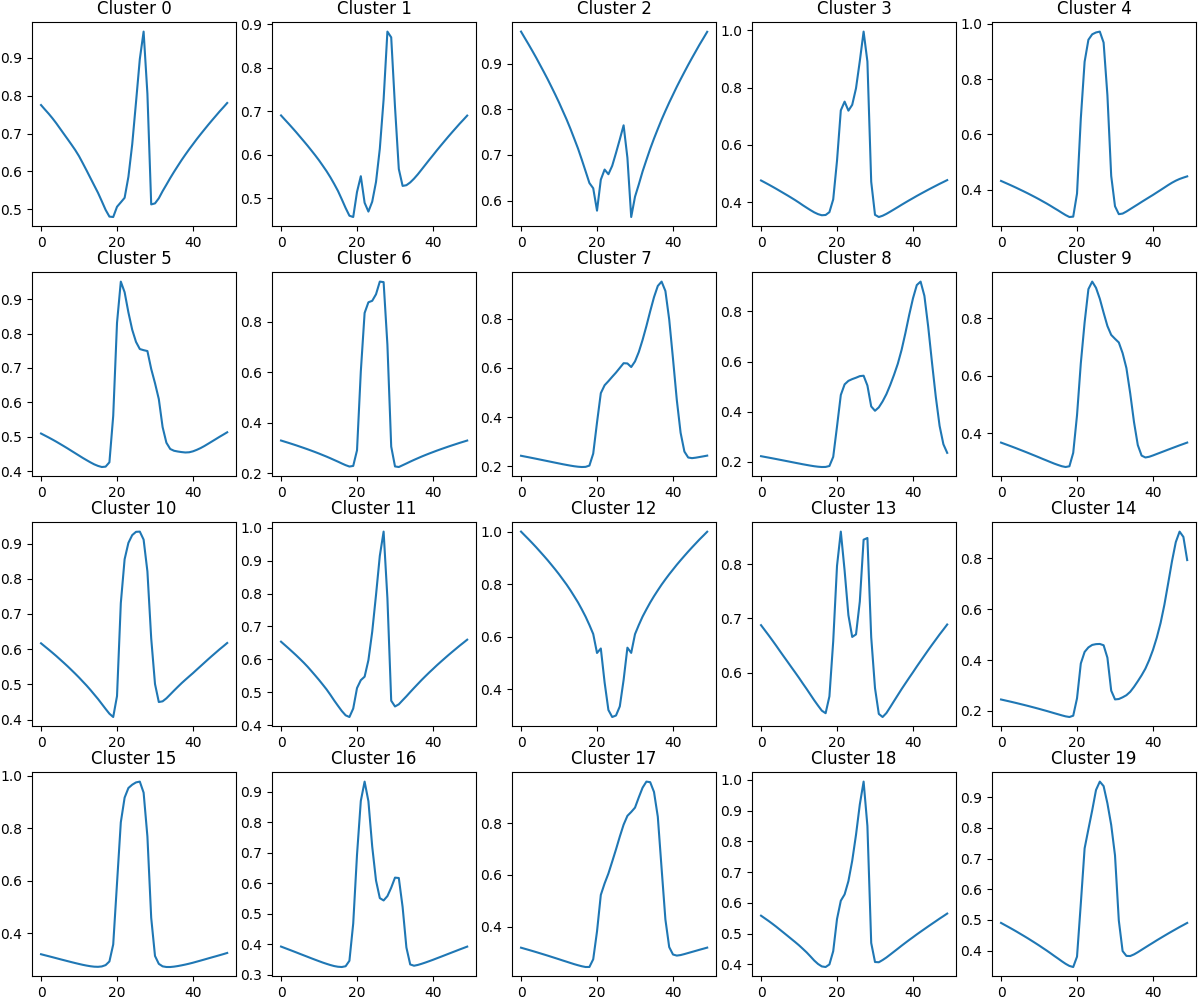

In [10]:
classes = sorted(np.unique(cluster.labels_))
clusters = cluster.labels_
meanLine = []
for c in classes:
    idxs = clusters == c
    meanLine.append(np.mean(data.lines[1].numpy()[idxs], axis=0))
root = int(np.sqrt(numClusters))
if root**2 >= numClusters:
    gridSize = (root, root)
elif (root+1) * root >= numClusters:
    gridSize = (root, root+1)
else:
    gridSize = (root+1, root+1)
    
fig, ax = plt.subplots(*gridSize, figsize=(12,10))
for row in range(gridSize[0]):
    for col in range(gridSize[1]):
        i = row * gridSize[1] + col
        if i >= numClusters:
            break
            
        ax[row, col].plot(meanLine[i])
        ax[row, col].set_title('Cluster %d' % i)
        
fig.tight_layout(pad=0)

In [11]:
classIndices = []
numSamples = 200
for c in classes:
    indices = np.nonzero(clusters == c)[0]
    np.random.shuffle(indices)
    classIndices.append(indices[:numSamples])
flatIndices = np.concatenate(classIndices)

In [15]:
import torch
outData = {}
outData['wavelength'] = data.wls
outData['z'] = data.z
outData['temperature'] = torch.split(10**data.temperature[flatIndices], 1, dim=0)
outData['temperature'] = [t.squeeze().clone().float() for t in outData['temperature']]
outData['ne'] = torch.split(10**data.ne[flatIndices], 1, dim=0)
outData['ne'] = [n.squeeze().clone().float() for n in outData['ne']]
vel = data.vel[flatIndices]
velSign = vel / np.abs(vel)
velSign[velSign != velSign] = 0.0
outData['vel'] = torch.split((10**(np.abs(vel)) - 1.0) * velSign * 1e5, 1, dim=0)
outData['vel'] = [v.squeeze().clone().float() for v in outData['vel']]
outData['line'] = [torch.split(data.lines[0][flatIndices], 1, dim=0), torch.split(data.lines[1][flatIndices], 1, dim=0)]
outData['line'] = [[l.squeeze().clone().float() for l in line] for line in outData['line']]
outData['lineInfo'] = ['Ha', 'Ca8542']

In [16]:
import pickle
with open('/local0/scratch/HAlphaGridExportStatic/MiniBalancedTraining.pickle', 'wb') as f:
    pickle.dump(outData, f, pickle.HIGHEST_PROTOCOL)

<IPython.core.display.Javascript object>


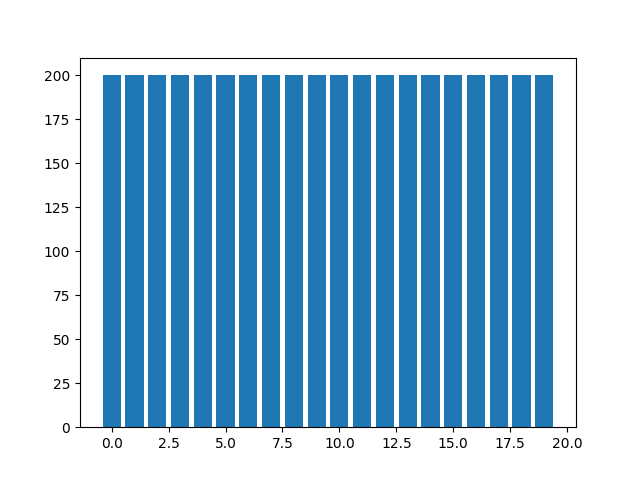

<BarContainer object of 20 artists>

In [17]:
h = np.histogram(cluster.labels_[flatIndices], bins=np.unique(cluster.labels_[flatIndices]).shape[0])
plt.figure()
plt.bar(sorted(np.unique(cluster.labels_[flatIndices])), h[0])